In [61]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [62]:
df = pd.read_excel('Excel data anti-LGBTQ+ laws.ods')

In [63]:
df.head()

,Unnamed: 0,2025,Unnamed: 2,Unnamed: 3,Unnamed: 4,2024,Unnamed: 6,Unnamed: 7,Unnamed: 8,2023,...,Unnamed: 23,Unnamed: 24,2019,Unnamed: 26,Unnamed: 27,Unnamed: 28,2018,Unnamed: 30,Unnamed: 31,Unnamed: 32
0,year,Form,State,Bill No.,Status,Form,State,Bill No.,Status,Form,...,Bill No.,Status,Form,State,Bill No.,Status,Form,State,Bill No.,Status
1,2025,Anti-LGBTIQ+ school or curriculum restrictions...,AL,H.B.244,Advancing,Anti-LGBTIQ+ school or curriculum restrictions,AK,H.B. 382,Committee invited testimony 22/3/24,Excluding TGD youth from athletics,...,SB 219,Referred to committee 3/10/20,Single-Sex Facility Restrictions,IN,HB 1525,Dead 4/29/19,Single-Sex Facility Restrictions,IA,HF 2164,Session ended 1/31/18
2,2025,Anti-LGBTIQ+ school or curriculum restrictions...,AL,H.B.67,Advancing,Excluding TGD youth from athletics,AK,H.B. 183,Referred to committee 15/3/24,Restrictions on accurate ID (or TGD expression),...,HB 303,Introduced 2/27/20,Single-Sex Facility Restrictions,MA,HB 1427,Referred to the committee 1/22/19,Single-Sex Facility Restrictions,IA,SF 2296,Session ended 2/19/18
3,2025,Anti-LGBTIQ+ school or curriculum restrictions...,AL,H.B.246,Advancing,Anti-LGBTIQ+ (other),AK,HB 174,Referred to committee 23/2/24,Single-sex Facility Restrictions,...,HB 20-1114,Postponed indefinitely 2/13/20,Single-Sex Facility Restrictions,MA,HB 1504,Referred to the committee 1/22/19,Single-Sex Facility Restrictions,KY,HB 326,Session ended 2/19/18
4,2025,Anti-LGBTIQ+ (other),AL,S.B.228,Advancing,Restricting TGD youth healthcare,AK,H.B. 338,Advancing with testimony 8/3/24,Anti-LGBTQ+ school or curriculum,...,SB 1864,Dead 3/14/20,Single-Sex Facility Restrictions,TN,SB 1297,Passed 5/9/19,Single-Sex Facility Restrictions,MO,SB 690,Referred to committee 1/10/18


hm. I've got some work to do here (^that part didn't have the year column originally and was somehow even messier)

In [64]:
df = pd.read_excel('Excel data anti-LGBTQ+ laws.ods', header=1, usecols='A:E')

In [65]:
df.head()

,year,Form,State,Bill No.,Status
0,2025,Anti-LGBTIQ+ school or curriculum restrictions...,AL,H.B.244,Advancing
1,2025,Anti-LGBTIQ+ school or curriculum restrictions...,AL,H.B.67,Advancing
2,2025,Anti-LGBTIQ+ school or curriculum restrictions...,AL,H.B.246,Advancing
3,2025,Anti-LGBTIQ+ (other),AL,S.B.228,Advancing
4,2025,Anti-LGBTIQ+ (other),AL,H.B.418,Advancing


Took some fiddling in the spreadsheet, but this is much better

In [66]:
df.rename(columns={'year': 'Year'}, inplace=True) # That was annoying me
df.head()

,Year,Form,State,Bill No.,Status
0,2025,Anti-LGBTIQ+ school or curriculum restrictions...,AL,H.B.244,Advancing
1,2025,Anti-LGBTIQ+ school or curriculum restrictions...,AL,H.B.67,Advancing
2,2025,Anti-LGBTIQ+ school or curriculum restrictions...,AL,H.B.246,Advancing
3,2025,Anti-LGBTIQ+ (other),AL,S.B.228,Advancing
4,2025,Anti-LGBTIQ+ (other),AL,H.B.418,Advancing


Let's make sure the data is good to use

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      2199 non-null   int64 
 1   Form      2199 non-null   object
 2   State     2199 non-null   object
 3   Bill No.  2199 non-null   object
 4   Status    2199 non-null   object
dtypes: int64(1), object(4)
memory usage: 86.0+ KB


That's really the only main thing to check for at this stage

In [68]:
df.sort_values(by='Year', ascending=True, inplace=True)
df.head()

,Year,Form,State,Bill No.,Status
2198,2018,Restricting local LGBTQ+ protections from surp...,WY,HB 167,Session ended 2/16/18
2197,2018,Restricting local LGBTQ+ protections from surp...,TN,HB 892,Session ended 1/17/18
2196,2018,Restricting local LGBTQ+ protections from surp...,SC,H 4949,Referred to committee 2/15/18
2163,2018,Restoring 'Religious Freedom' Against LGBTQ+ D...,CO,HB 1206,Session ended 3/27/18
2164,2018,Restoring 'Religious Freedom' Against LGBTQ+ D...,KY,HB 372,Session ended 3/22/18


[Text(0.5, 1.0, 'Anti-LGBTQ+ Bills Introduced By Year')]

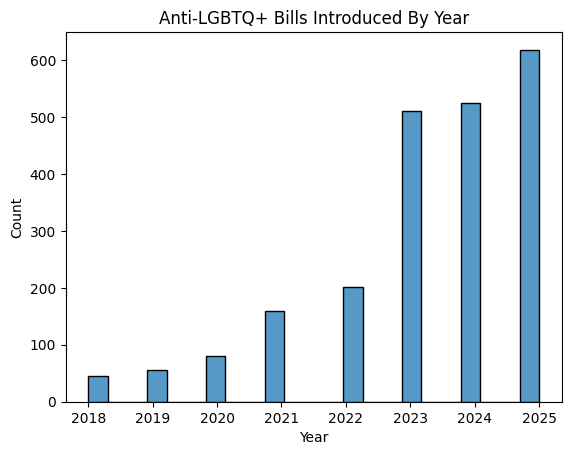

In [105]:
sns.histplot(data=df, x='Year').set(title='Anti-LGBTQ+ Bills Introduced By Year')

So here we see a clear increase as time goes on, as expected, but what I really want to point out is that each election cycle heralds a new dramatic shift. '21-'22 is much more than before, same with '23-'24 and '25.

Next I wanna get a count plot showing the top x states, but to do that I need my data ordered by a state's frequency. I'm not really sure how to do that, so the following will be me playing around to figure it out.

In [70]:
state_count = df.State.value_counts()
print(state_count)
type(state_count)

State
TX    184
MO    167
OK    148
TN    132
IA    128
WV     93
SC     93
MS     84
KY     62
WI     61
MN     56
IN     51
AZ     49
GA     49
KS     47
VA     45
MI     43
FL     42
ID     41
NH     38
UT     37
WY     36
NC     33
NJ     33
MT     32
AL     32
AR     30
SD     29
OH     28
IL     24
ND     23
PA     22
HI     20
CT     19
LA     19
RI     19
OR     18
AK     16
MA     15
WA     14
CO     12
NM     12
ME     12
NE     12
MD     10
CA      7
NV      6
DE      5
VT      4
NY      4
PR      3
Name: count, dtype: int64


pandas.core.series.Series

In [71]:
state_count = pd.DataFrame(state_count)
state_count.head()

,count
State,
TX,184
MO,167
OK,148
TN,132
IA,128


In [72]:
df['Count'] = df.groupby('State')['State'].transform('count')
df.sort_values(['Count', 'State'], ascending=[False, True], inplace=True)
df

,Year,Form,State,Bill No.,Status,Count
2146,2019,Anti-LGBTQ+ school or curriculum restrictions,TX,SB 880,Dead 5/27/19,184
2119,2019,Restricts TGD youth healthcare,TX,HB 1910,Dead 5/27/19,184
2141,2019,Restoring 'Religious Freedom' Against LGBTQ+ D...,TX,HB 2109,Dead 5/27/19,184
2142,2019,Restoring 'Religious Freedom' Against LGBTQ+ D...,TX,HB 4512,Dead 5/2/19,184
2128,2019,Implicating LGBTQ+ people in Healthcare Religi...,TX,SB 85,Dead 5/27/19,184
...,...,...,...,...,...,...
1080,2024,Religious 'Freedom' for LGBTIQ+ Discrimination...,VT,H 183,Carried over 7/2/23,4
1081,2024,Excluding TGD youth from athletics,VT,H 513,Introduced 1/3/24,4
977,2024,Religious 'Freedom' for LGBTIQ+ Discrimination...,PR,PS 1345,Introduced 8/1/24,3
978,2024,Religious 'Freedom' for LGBTIQ+ Discrimination...,PR,PC 1887,Carried over 8/1/24,3


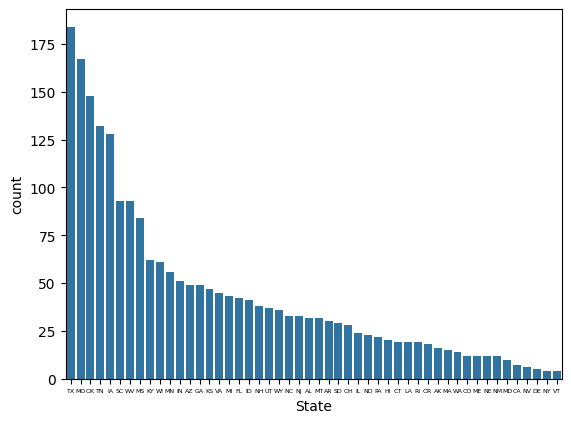

In [104]:
sns.countplot(data=df, x='State').tick_params(axis='x', labelsize=4.5)

Most of the above is pretty useless, but I realized a bar plot would work just as well

[Text(0.5, 1.0, 'Top 10 States 2018-2025'),
 Text(0, 0.5, 'Anti-LGBTQ+ Bills Introduced')]

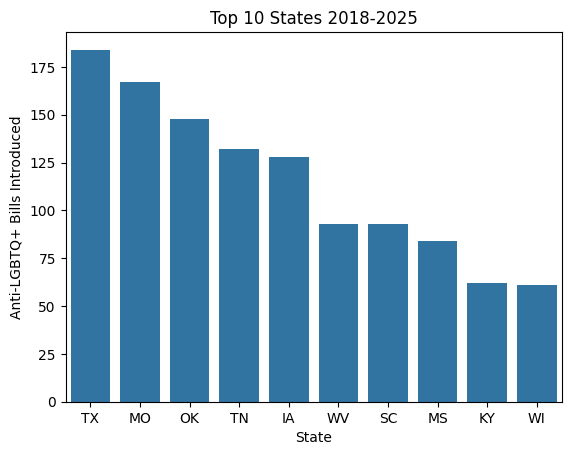

In [74]:
sns.barplot(data=state_count[:10], x='State', y='count').set(title='Top 10 States 2018-2025', ylabel='Anti-LGBTQ+ Bills Introduced')

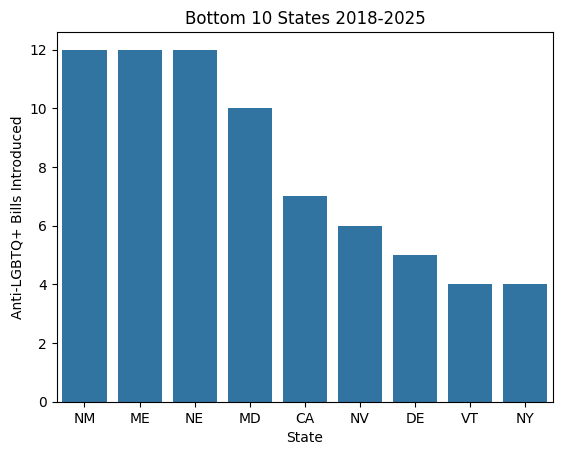

In [84]:
bottom_states = sns.barplot(data=state_count[41:], x='State', y='count').set(title='Bottom 10 States 2018-2025', ylabel='Anti-LGBTQ+ Bills Introduced')

Ah, there's a cleaning issue. I'm only interested in states, so Puerto Rico should be dropped. After doing so I can re-run the above plots for the corrected data

In [ ]:
state_count.drop('PR', inplace=True)

In [ ]:
df = df[df.State != 'PR']

The original question I set out on was the overall shift in change with anti-trans legislation, so let's try to filter to that specifically

In [88]:
trans_df = df[df['Form'].str.contains('Single-sex facility|ID|TGD', case=False)]
trans_df

,Year,Form,State,Bill No.,Status,Count
2119,2019,Restricts TGD youth healthcare,TX,HB 1910,Dead 5/27/19,184
2106,2019,Anti-TGD Religious Exemptions,TX,HB 1035,Dead 5/27/19,184
2110,2019,Restricts TGD youth healthcare,TX,SB 1107,Dead 5/27/19,184
2120,2019,Restricts TGD youth healthcare,TX,SB 2369,Dead 5/27/19,184
1951,2021,Excluding TGD youth from athletics,TX,HB 25,Governor signed 10/25/21,184
...,...,...,...,...,...,...
597,2025,Excluding TGD youth from athletics,NY,S.460,Advancing,4
598,2025,Excluding TGD youth from athletics,NY,S.4496,Advancing,4
599,2025,Excluding TGD youth from athletics,NY,A.7741,Advancing,4
1608,2023,Excluding TGD youth from athletics,VT,H. 513,Referred to committee 7/4/23,4


Wow. The origianl set had 2,199 entries, this is nearly half!

[Text(0.5, 1.0, 'Anti-Trans Bills Introduced By Year'), Text(0, 0.5, 'Count')]

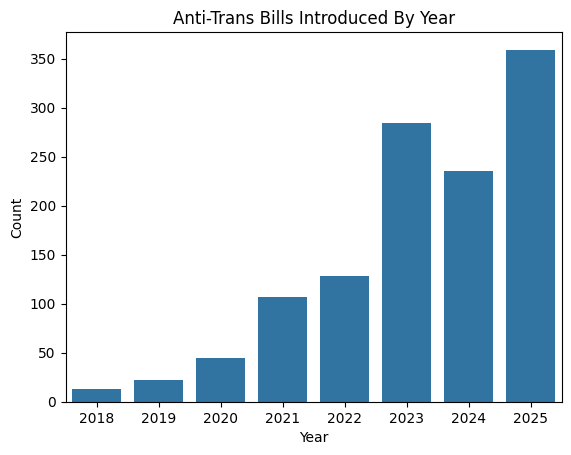

In [108]:
sns.countplot(data=trans_df, x='Year').set(title='Anti-Trans Bills Introduced By Year', ylabel='Count')

This follows the general election-cylce trend of the overall chart, but the dip in 2024 is interesting

In [ ]:
state_count.info()
# Out of order here, but I wanted to verify that every state is included here. To my disappointment, they are.

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, TX to NY
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   50 non-null     int64
dtypes: int64(1)
memory usage: 2.8+ KB
